In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import sklearn as sklearn
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler
from termcolor import colored as cl
from sklearn.metrics import explained_variance_score as evs

import os
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')


In [2]:
df=pd.read_csv('House Price.csv')

In [3]:
df.shape

(1460, 11)

In [4]:
df.head()

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1460 non-null   int64  
 1   LotFrontage  1201 non-null   float64
 2   LotArea      1460 non-null   int64  
 3   Alley        91 non-null     object 
 4   MasVnrArea   1452 non-null   float64
 5   1stFlrSF     1460 non-null   int64  
 6   2ndFlrSF     1460 non-null   int64  
 7   GrLivArea    1460 non-null   int64  
 8   GarageType   1379 non-null   object 
 9   GarageArea   1460 non-null   int64  
 10  SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 125.6+ KB


In [6]:
# we check for null or missing values in the dataset
df.isnull().sum() 

Id                0
LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [7]:

df.describe()

,Id,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,1162.626712,346.992466,1515.463699,472.980137,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,386.587738,436.528436,525.480383,213.804841,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,882.000000,0.000000,1129.500000,334.500000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,1087.000000,0.000000,1464.000000,480.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,1391.250000,728.000000,1776.750000,576.000000,214000.000000
max,1460.000000,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000


In [8]:
df.set_index('Id', inplace = True)

In [9]:
df.skew()

LotFrontage     2.163569
LotArea        12.207688
MasVnrArea      2.669084
1stFlrSF        1.376757
2ndFlrSF        0.813030
GrLivArea       1.366560
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [10]:
df.corr()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.457181,0.080177,0.402797,0.344997,0.351799
LotArea,0.426095,1.000000,0.104160,0.299475,0.050986,0.263116,0.180403,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.344501,0.174561,0.390857,0.373066,0.477493
1stFlrSF,0.457181,0.299475,0.344501,1.000000,-0.202646,0.566024,0.489782,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.202646,1.000000,0.687501,0.138347,0.319334
GrLivArea,0.402797,0.263116,0.390857,0.566024,0.687501,1.000000,0.468997,0.708624
GarageArea,0.344997,0.180403,0.373066,0.489782,0.138347,0.468997,1.000000,0.623431
SalePrice,0.351799,0.263843,0.477493,0.605852,0.319334,0.708624,0.623431,1.000000


<AxesSubplot:>

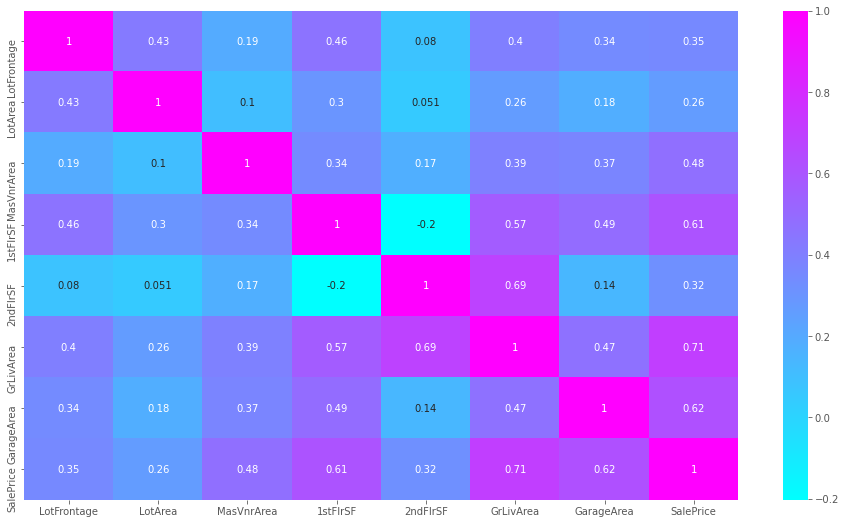

In [11]:
f, ax = plt.subplots(figsize=(16,9))
sns.heatmap(df.corr(),cmap="cool",annot=True)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   LotArea      1460 non-null   int64  
 2   Alley        91 non-null     object 
 3   MasVnrArea   1452 non-null   float64
 4   1stFlrSF     1460 non-null   int64  
 5   2ndFlrSF     1460 non-null   int64  
 6   GrLivArea    1460 non-null   int64  
 7   GarageType   1379 non-null   object 
 8   GarageArea   1460 non-null   int64  
 9   SalePrice    1460 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 125.5+ KB


In [13]:
# so lets name the NaN entries as Misssing in all the object datatype columns
df['Alley'].fillna('Missing',inplace=True)
df['GarageType'].fillna('Missing',inplace=True)

In [14]:
#we can also see that there are some numerical values missing from columns- 
# 1.LotFrontage
# 2.MasVnrArea

# we will replace these values with median as there are outliers 

df['LotFrontage'].fillna(70.0,inplace=True)
df['MasVnrArea'].fillna(103.6,inplace=True)

In [15]:
df.isnull().sum() 
# we have treated all the null values 

LotFrontage    0
LotArea        0
Alley          0
MasVnrArea     0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageType     0
GarageArea     0
SalePrice      0
dtype: int64

In [16]:
df.skew()

LotFrontage     2.386156
LotArea        12.207688
MasVnrArea      2.676420
1stFlrSF        1.376757
2ndFlrSF        0.813030
GrLivArea       1.366560
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

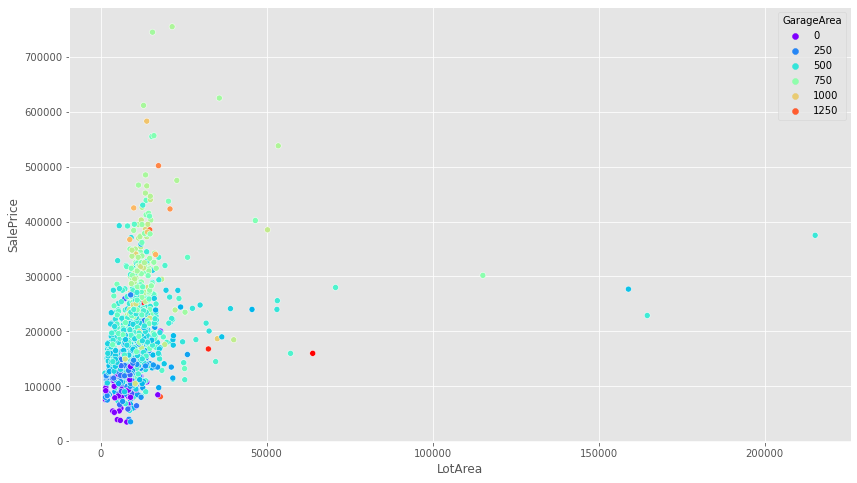

In [17]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x="LotArea",y="SalePrice",hue="GarageArea",palette='rainbow')

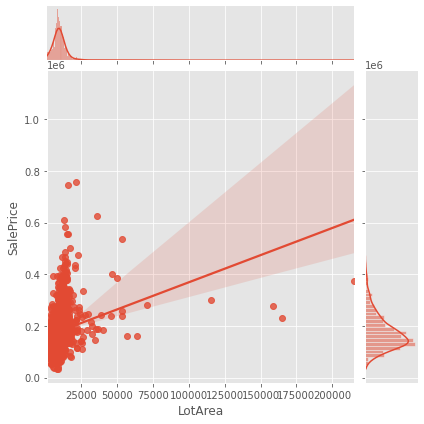

In [18]:
sns.jointplot(data=df,x="LotArea",y="SalePrice",kind="reg",palette='rainbow');

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

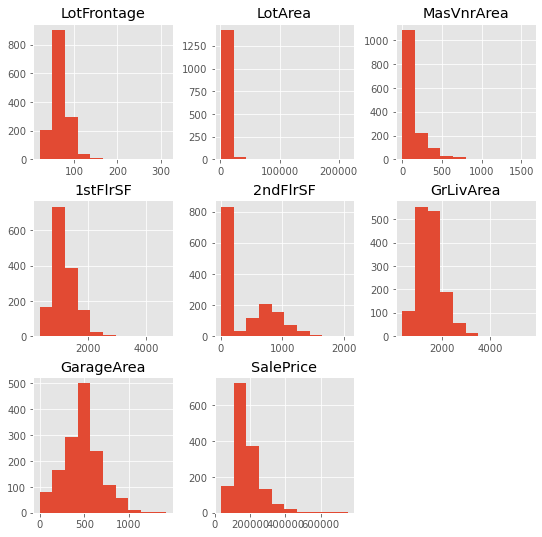

In [19]:
df.hist(figsize = (9,9))

<AxesSubplot:xlabel='SalePrice'>

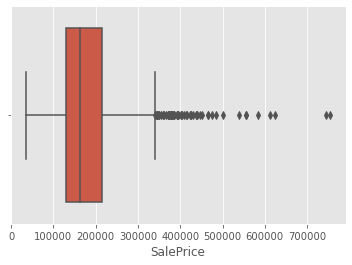

In [20]:
sns.boxplot(x='SalePrice',hue='LotArea',data=df)

C:\Users\Shyam Adsul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

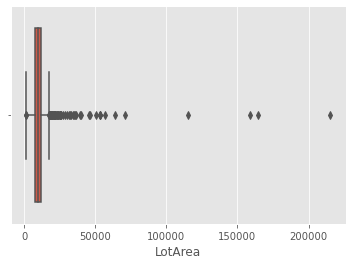

In [21]:
sns.boxplot(df['LotArea'])

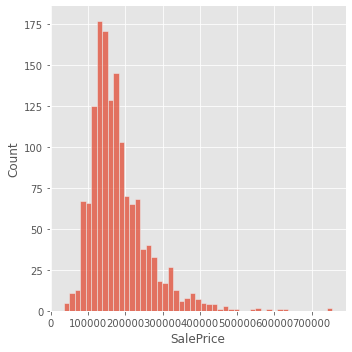

In [22]:
sns.displot(df.SalePrice)

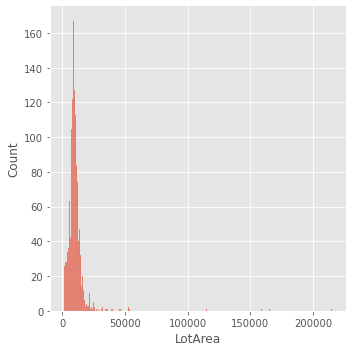

In [23]:
sns.displot(df.LotArea)

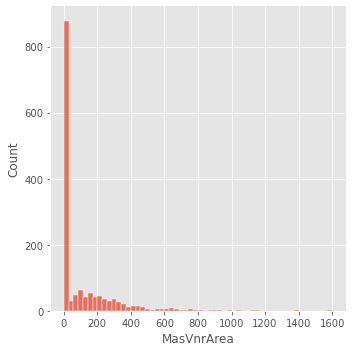

In [24]:
sns.displot(df.MasVnrArea)

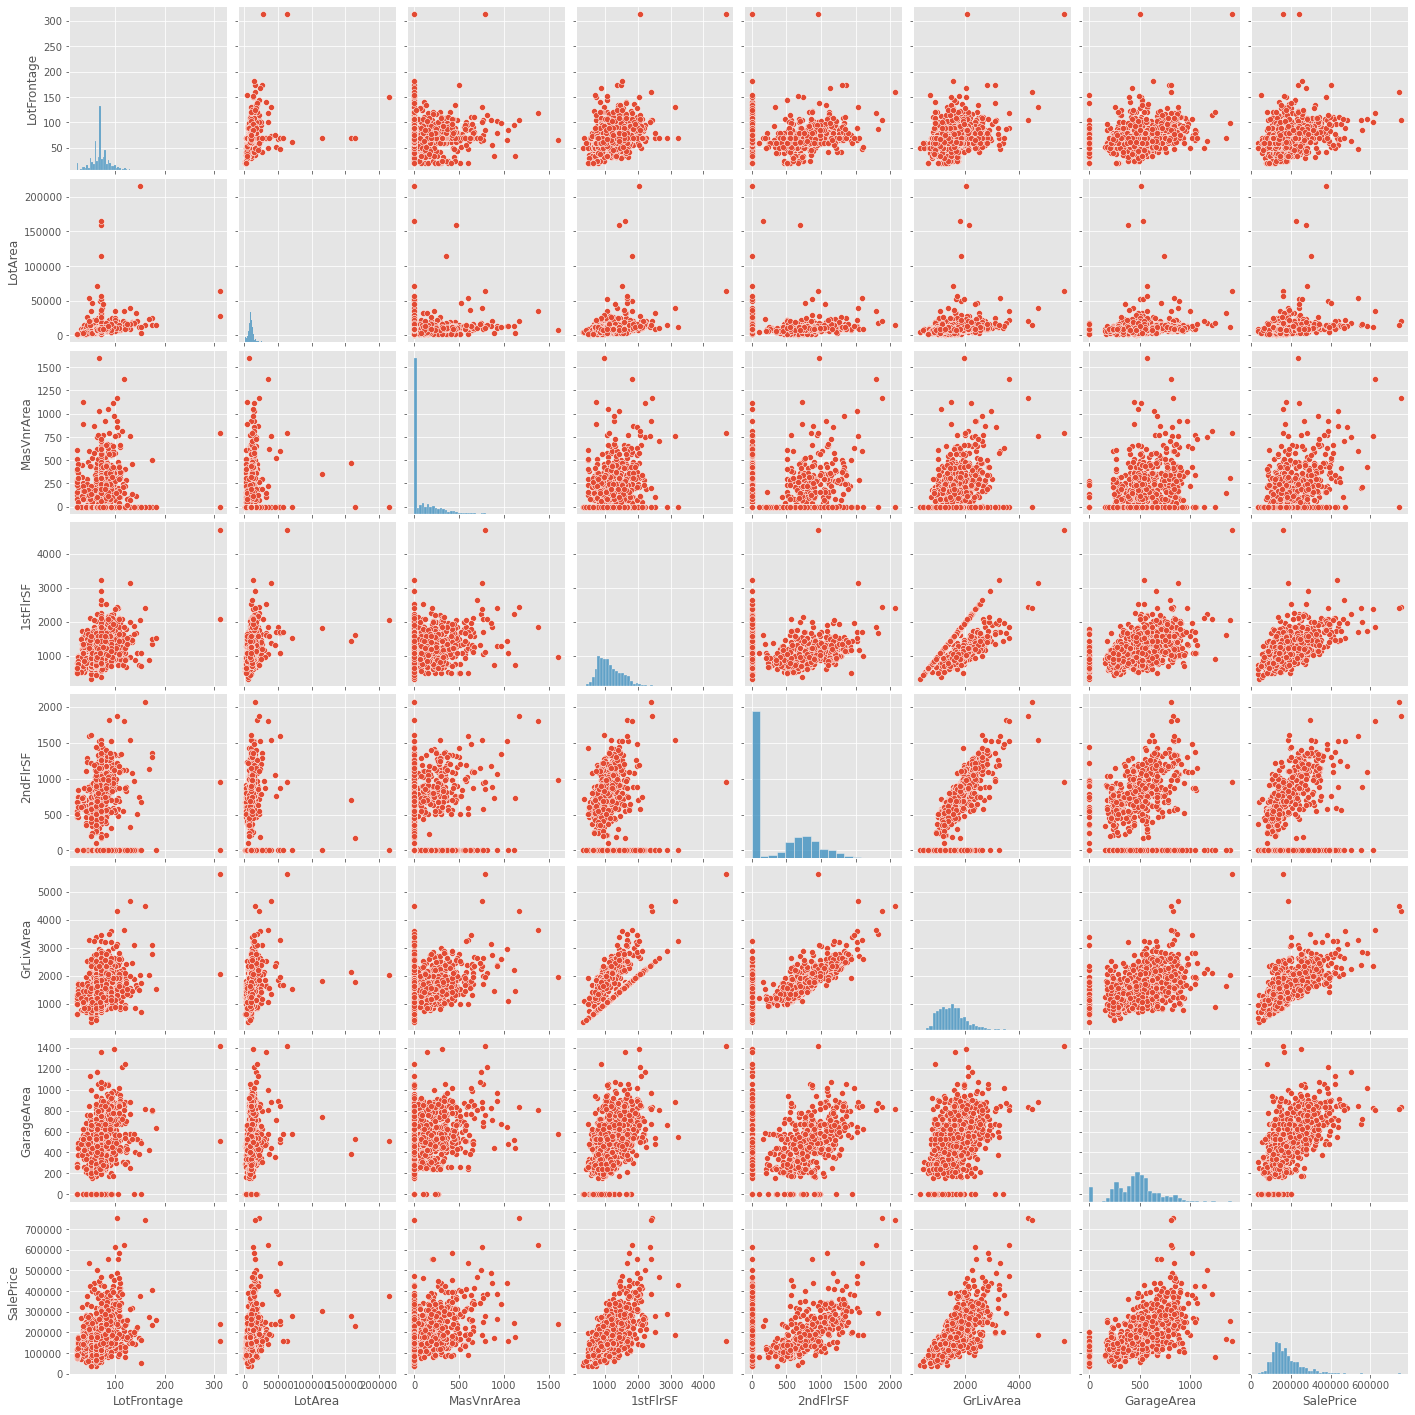

In [25]:
sns.pairplot(df)

In [26]:
df1=df.copy()

In [27]:
df1.head()

,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
Id,,,,,,,,,,
1,65.0,8450,Missing,196.0,856,854,1710,Attchd,548,208500
2,80.0,9600,Missing,0.0,1262,0,1262,Attchd,460,181500
3,68.0,11250,Missing,162.0,920,866,1786,Attchd,608,223500
4,60.0,9550,Missing,0.0,961,756,1717,Detchd,642,140000
5,84.0,14260,Missing,350.0,1145,1053,2198,Attchd,836,250000


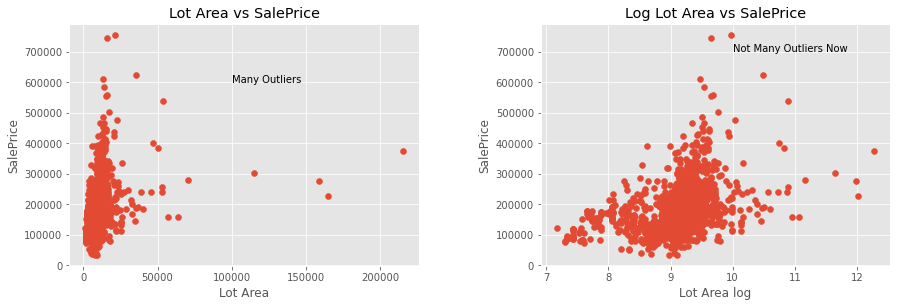

In [28]:
plt.subplot(122)
plt.xlabel("Lot Area log")
plt.ylabel("SalePrice")
plt.title("Log Lot Area vs SalePrice")
plt.text(10,700000,"Not Many Outliers Now")
plt.scatter(np.log(df1["LotArea"]),df1["SalePrice"])

plt.subplot(121)
plt.xlabel("Lot Area")
plt.ylabel("SalePrice")
plt.title("Lot Area vs SalePrice")
plt.scatter(df1["LotArea"],df1["SalePrice"])
plt.text(100000,600000,"Many Outliers")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

In [29]:
df2= pd.get_dummies(df1['Alley'],drop_first=True,dtype=np.int64)
df1= pd.concat([df1,df2],axis=1)
df3= pd.get_dummies(df1['GarageType'],drop_first=True,dtype=np.int64)
df1= pd.concat([df1,df3],axis=1)
df1.drop(['Alley','GarageType'],inplace=True,axis=1)

In [30]:
df1.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68.0,11250,162.0,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60.0,9550,0.0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   LotArea      1460 non-null   int64  
 2   MasVnrArea   1460 non-null   float64
 3   1stFlrSF     1460 non-null   int64  
 4   2ndFlrSF     1460 non-null   int64  
 5   GrLivArea    1460 non-null   int64  
 6   GarageArea   1460 non-null   int64  
 7   SalePrice    1460 non-null   int64  
 8   Missing      1460 non-null   int64  
 9   Pave         1460 non-null   int64  
 10  Attchd       1460 non-null   int64  
 11  Basment      1460 non-null   int64  
 12  BuiltIn      1460 non-null   int64  
 13  CarPort      1460 non-null   int64  
 14  Detchd       1460 non-null   int64  
 15  Missing      1460 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 193.9 KB


<AxesSubplot:>

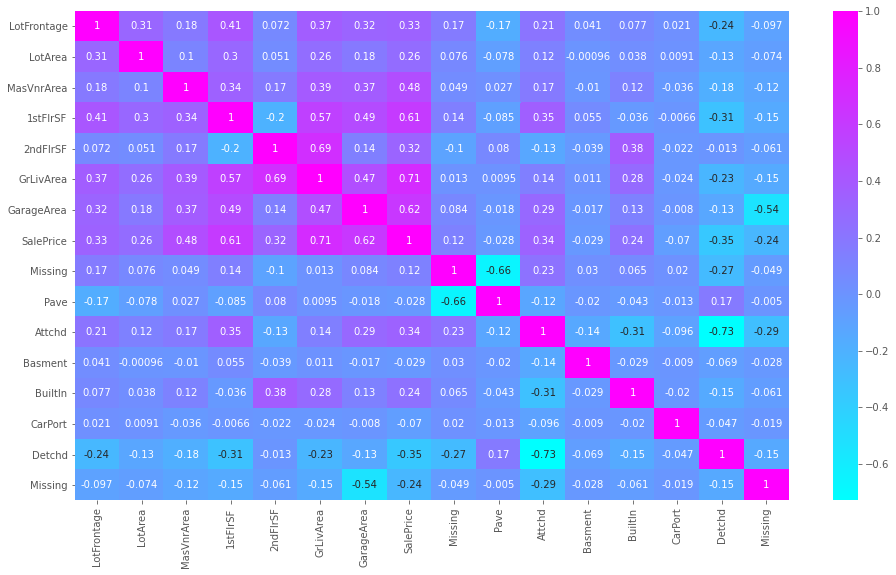

In [32]:
f, ax = plt.subplots(figsize=(16,9))
sns.heatmap(df1.corr(),cmap="cool",annot=True)

## 1.Standard Scaler

In [33]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df1)
df4 = pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)

In [34]:
df_scaled

array([[-0.22896913, -0.20714171,  0.511421  , ..., -0.07875671,
        -0.60055892, -0.24235968],
       [ 0.45233847, -0.09188637, -0.57440788, ..., -0.07875671,
        -0.60055892, -0.24235968],
       [-0.09270761,  0.07347998,  0.32306293, ..., -0.07875671,
        -0.60055892, -0.24235968],
       ...,
       [-0.18354862, -0.14781027, -0.57440788, ..., -0.07875671,
        -0.60055892, -0.24235968],
       [-0.09270761, -0.08016039, -0.57440788, ..., -0.07875671,
        -0.60055892, -0.24235968],
       [ 0.22523594, -0.05811155, -0.57440788, ..., -0.07875671,
        -0.60055892, -0.24235968]])

In [35]:
df4.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
0,-0.228969,-0.207142,0.511421,-0.793434,1.161852,0.370333,0.351000,0.347273,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
1,0.452338,-0.091886,-0.574408,0.257140,-0.795163,-0.482512,-0.060731,0.007288,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
2,-0.092708,0.073480,0.323063,-0.627826,1.189351,0.515013,0.631726,0.536154,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
3,-0.456072,-0.096897,-0.574408,-0.521734,0.937276,0.383659,0.790804,-0.515281,0.257821,-0.169981,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236
4,0.634020,0.375148,1.364572,-0.045611,1.617877,1.299326,1.698485,0.869843,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

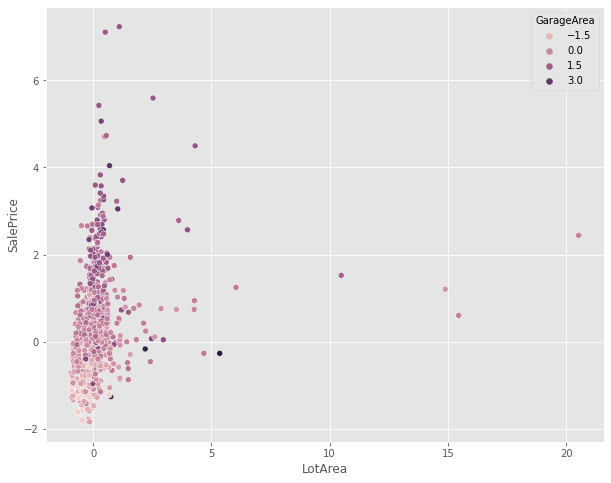

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df4,x="LotArea",y="SalePrice",hue="GarageArea")

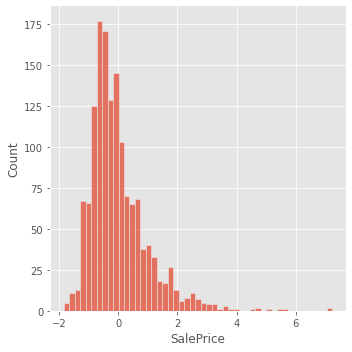

In [37]:
sns.displot(df4.SalePrice)

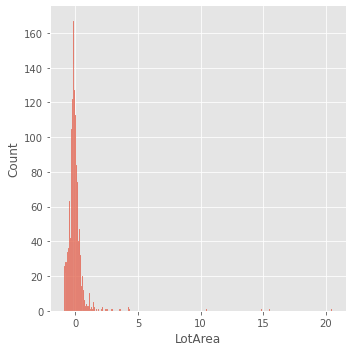

In [38]:
sns.displot(df4.LotArea)

In [39]:
df4.LotArea.skew()

12.207687851233501

### As it can be seen from the above visualisations that the standard scaler is not helping in transforming the data

## 2.Log Transformation

In [40]:
df1.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68.0,11250,162.0,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60.0,9550,0.0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


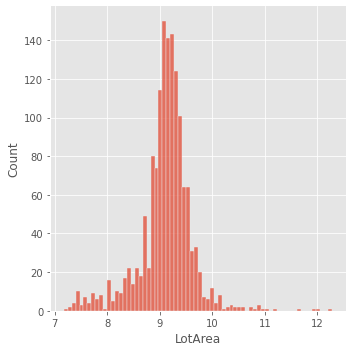

In [41]:
df_log = np.log(df1['LotArea'])
sns.displot(df_log)

In [42]:
df_log.skew()

-0.1379938086958118

C:\Users\Shyam Adsul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

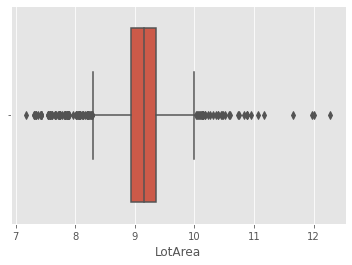

In [43]:
sns.boxplot(df_log)

## 3.Min Max Scaler

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
df5 = pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)

In [45]:
df5.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
0,-0.228969,-0.207142,0.511421,-0.793434,1.161852,0.370333,0.351000,0.347273,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
1,0.452338,-0.091886,-0.574408,0.257140,-0.795163,-0.482512,-0.060731,0.007288,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
2,-0.092708,0.073480,0.323063,-0.627826,1.189351,0.515013,0.631726,0.536154,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
3,-0.456072,-0.096897,-0.574408,-0.521734,0.937276,0.383659,0.790804,-0.515281,0.257821,-0.169981,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236
4,0.634020,0.375148,1.364572,-0.045611,1.617877,1.299326,1.698485,0.869843,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236


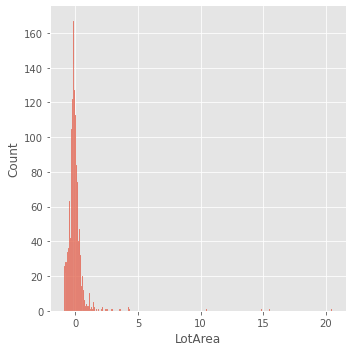

In [46]:
sns.displot(df5.LotArea)

In [47]:
df1.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68.0,11250,162.0,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60.0,9550,0.0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


In [48]:
df1['MasVnrArea']=df1['MasVnrArea'].astype('int64')
df1['LotFrontage']=df1['LotFrontage'].astype('int64')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X=df1[['LotFrontage','LotArea','MasVnrArea','GrLivArea','GarageArea','Attchd','Basment','BuiltIn','CarPort','Detchd','Pave','Missing']]
y=df1['SalePrice']    

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [52]:
lm=LinearRegression()
lm.fit(X_train,y_train)
lm_yhat=lm.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
print('The R-squared value is ',r2_score(y_test,lm_yhat))

The R-squared value is  0.7157379825725529


In [54]:
df6=df1.copy()

In [55]:
df6.skew()

LotFrontage     2.386156
LotArea        12.207688
MasVnrArea      2.676474
1stFlrSF        1.376757
2ndFlrSF        0.813030
GrLivArea       1.366560
GarageArea      0.179981
SalePrice       1.882876
Missing        -3.624557
Pave            5.718902
Attchd         -0.391218
Basment         8.602751
BuiltIn         3.699075
CarPort        12.631556
Detchd          1.065652
Missing         3.887735
dtype: float64

In [56]:
df6.describe()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.041096,10516.828082,103.681507,1162.626712,346.992466,1515.463699,472.980137,180921.195890,0.937671,0.028082,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479
std,22.024031,9981.264932,180.569120,386.587738,436.528436,525.480383,213.804841,79442.502883,0.241835,0.165264,0.490887,0.113372,0.238075,0.078298,0.441521,0.228992
min,21.000000,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,882.000000,0.000000,1129.500000,334.500000,129975.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9478.500000,0.000000,1087.000000,0.000000,1464.000000,480.000000,163000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,164.250000,1391.250000,728.000000,1776.750000,576.000000,214000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df6.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65,8450,196,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80,9600,0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68,11250,162,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60,9550,0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84,14260,350,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


In [58]:
df6['LotArea']=np.log(df6['LotArea'])
df6['1stFlrSF']=np.log(df6['1stFlrSF'])
df6['LotFrontage']=np.log(df6['LotFrontage'])
df6['GrLivArea']=np.log(df6['GrLivArea'])
df6['SalePrice']=np.log(df6['SalePrice'])

In [59]:
df6.rename(columns={'2ndFlrSF':'SecFlrSF'},inplace=True)
df6.rename(columns={'1stFlrSF':'FstFlrSF'},inplace=True)

In [60]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

df6['MasVnrArea'] = normalize(df6.MasVnrArea)
df6['SecFlrSF']=normalize(df6.SecFlrSF)
df6['GarageArea']=normalize(df6.GarageArea)
df6['LotFrontage']=normalize(df6.LotFrontage)
df6['LotArea']=normalize(df6.LotArea)
df6['FstFlrSF']=normalize(df6.FstFlrSF)
df6['GrLivArea']=normalize(df6.GrLivArea)
df6['SalePrice']=normalize(df6.SalePrice)

In [61]:
df6.head()

,LotFrontage,LotArea,MasVnrArea,FstFlrSF,SecFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,0.418208,0.366344,0.12250,0.356155,0.413559,0.577712,0.386460,0.581431,1,0,1,0,0,0,0,0
2,0.495064,0.391317,0.00000,0.503056,0.000000,0.470245,0.324401,0.536319,1,0,1,0,0,0,0,0
3,0.434909,0.422359,0.10125,0.383441,0.419370,0.593095,0.428773,0.604029,1,0,1,0,0,0,0,0
4,0.388581,0.390295,0.00000,0.399941,0.366102,0.579157,0.452750,0.451871,1,0,0,0,0,0,1,0
5,0.513123,0.468761,0.21875,0.466237,0.509927,0.666523,0.589563,0.640477,1,0,1,0,0,0,0,0


In [62]:
df6.skew()

LotFrontage    -0.929799
LotArea        -0.137994
MasVnrArea      2.676474
FstFlrSF        0.079157
SecFlrSF        0.813030
GrLivArea      -0.006995
GarageArea      0.179981
SalePrice       0.121335
Missing        -3.624557
Pave            5.718902
Attchd         -0.391218
Basment         8.602751
BuiltIn         3.699075
CarPort        12.631556
Detchd          1.065652
Missing         3.887735
dtype: float64

In [63]:
#creating a new dataframe
df7=df1.copy()

In [64]:
# renaming the columns because whe using normalisation it shows error
df7.rename(columns={'2ndFlrSF':'SecFlrSF'},inplace=True)
df7.rename(columns={'1stFlrSF':'FstFlrSF'},inplace=True)

In [65]:
df7.describe()

,LotFrontage,LotArea,MasVnrArea,FstFlrSF,SecFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.041096,10516.828082,103.681507,1162.626712,346.992466,1515.463699,472.980137,180921.195890,0.937671,0.028082,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479
std,22.024031,9981.264932,180.569120,386.587738,436.528436,525.480383,213.804841,79442.502883,0.241835,0.165264,0.490887,0.113372,0.238075,0.078298,0.441521,0.228992
min,21.000000,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,882.000000,0.000000,1129.500000,334.500000,129975.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9478.500000,0.000000,1087.000000,0.000000,1464.000000,480.000000,163000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79.000000,11601.500000,164.250000,1391.250000,728.000000,1776.750000,576.000000,214000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#will create a separate function afterwards
#althouh used data with high variance and skewness to be transformed into Log trnsformation
df7['LotArea']=np.log(df7['LotArea'])
df7['FstFlrSF']=np.log(df7['FstFlrSF'])
df7['LotFrontage']=np.log(df7['LotFrontage'])
df7['GrLivArea']=np.log(df7['GrLivArea'])
df7['SalePrice']=np.log(df7['SalePrice'])

#df7['SecFlrSF']=np.log(df7['SecFlrSF'])
#df7['SecFlrSF'] = df7['SecFlrSF'].fillna(0)


In [67]:
np.seterr(divide = 'ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [68]:
df7.isnull().sum()

LotFrontage    0
LotArea        0
MasVnrArea     0
FstFlrSF       0
SecFlrSF       0
GrLivArea      0
GarageArea     0
SalePrice      0
Missing        0
Pave           0
Attchd         0
Basment        0
BuiltIn        0
CarPort        0
Detchd         0
Missing        0
dtype: int64

In [69]:
df7.head()

,LotFrontage,LotArea,MasVnrArea,FstFlrSF,SecFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,4.174387,9.041922,196,6.752270,854,7.444249,548,12.247694,1,0,1,0,0,0,0,0
2,4.382027,9.169518,0,7.140453,0,7.140453,460,12.109011,1,0,1,0,0,0,0,0
3,4.219508,9.328123,162,6.824374,866,7.487734,608,12.317167,1,0,1,0,0,0,0,0
4,4.094345,9.164296,0,6.867974,756,7.448334,642,11.849398,1,0,0,0,0,0,1,0
5,4.430817,9.565214,350,7.043160,1053,7.695303,836,12.429216,1,0,1,0,0,0,0,0


In [70]:
df7.describe()

,LotFrontage,LotArea,MasVnrArea,FstFlrSF,SecFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.201239,9.110838,103.681507,7.007501,346.992466,7.267774,472.980137,12.024051,0.937671,0.028082,0.595890,0.013014,0.060274,0.006164,0.265068,0.055479
std,0.320726,0.517448,180.569120,0.317730,436.528436,0.333550,213.804841,0.399452,0.241835,0.165264,0.490887,0.113372,0.238075,0.078298,0.441521,0.228992
min,3.044522,7.170120,0.000000,5.811141,0.000000,5.811141,0.000000,10.460242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.094345,8.929766,0.000000,6.782192,0.000000,7.029530,334.500000,11.775097,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.248495,9.156781,0.000000,6.991176,0.000000,7.288928,480.000000,12.001505,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.369448,9.358890,164.250000,7.237958,728.000000,7.482541,576.000000,12.273731,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.746203,12.279532,1600.000000,8.453614,2065.000000,8.637994,1418.000000,13.534473,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df7.skew()

LotFrontage    -0.929799
LotArea        -0.137994
MasVnrArea      2.676474
FstFlrSF        0.079157
SecFlrSF        0.813030
GrLivArea      -0.006995
GarageArea      0.179981
SalePrice       0.121335
Missing        -3.624557
Pave            5.718902
Attchd         -0.391218
Basment         8.602751
BuiltIn         3.699075
CarPort        12.631556
Detchd          1.065652
Missing         3.887735
dtype: float64

In [72]:
X=df7[['LotFrontage','LotArea','MasVnrArea','FstFlrSF','SecFlrSF','GrLivArea','GarageArea','Attchd','Basment','BuiltIn','CarPort','Detchd','Pave','Missing']]
y=df7['SalePrice']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [74]:
lm=LinearRegression()
lm.fit(X_train,y_train)
lm_yhat=lm.predict(X_test)

In [75]:
from sklearn.metrics import r2_score
print('The R-squared value is ',r2_score(y_test,lm_yhat))

The R-squared value is  0.7610433535449441


In [76]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,FstFlrSF,SecFlrSF,GrLivArea,GarageArea,Attchd,Basment,BuiltIn,CarPort,Detchd,Pave,Missing,Missing
Id,,,,,,,,,,,,,,,
622,4.499810,9.287301,0,7.344719,1066,7.868637,624,1,0,0,0,0,0,1,0
1024,3.761200,8.065265,14,7.315884,0,7.315884,437,1,0,0,0,0,0,1,0
766,4.317488,9.587886,284,7.317212,0,7.317212,592,1,0,0,0,0,0,1,0
898,4.158883,8.856234,0,7.021084,1120,7.714231,528,0,0,0,0,1,0,1,0
21,4.615121,9.562053,380,7.054450,1218,7.773174,853,0,0,1,0,0,0,1,0


In [77]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [78]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [79]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

8.964509269277388e-06

In [80]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=8.964509269277388e-06)

In [81]:
lasso_reg.score(X_test, y_test)

0.7611434823076808

In [82]:
from sklearn.svm import SVC

## SVR 

In [89]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf',C=1.0, verbose=True)

In [90]:
svr.fit(X_train, y_train)

[LibSVM]

SVR(verbose=True)

In [91]:
from sklearn.metrics import r2_score
score= r2_score(y_test,svr.predict(X_test))
score

0.5640805748553928

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1],'gamma':[0.001]}
grid= GridSearchCV(SVR(),param_grid, verbose=3)

In [93]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.408, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.262, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.350, total=   0.1s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.377, total=   0.1s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.294, total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(estimator=SVR(), param_grid={'C': [1], 'gamma': [0.001]},
             verbose=3)

In [94]:
grid.best_estimator_

SVR(C=1, gamma=0.001)

In [ ]:
svr_new=SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [ ]:
svr_new.fit(X_train, y_train)

In [ ]:
score_new= r2_score(y_test,svr_new.predict(X_test))
score_new

In [87]:
#accuracy is ------------------>>>>>>>>>>>>>>>>